### READ THE README.md FILE
Very Helpfull, thanks.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt


In [3]:
path = './data/train.csv'
Riders = pd.read_csv(path);

In [4]:
Riders.shape

(891, 12)

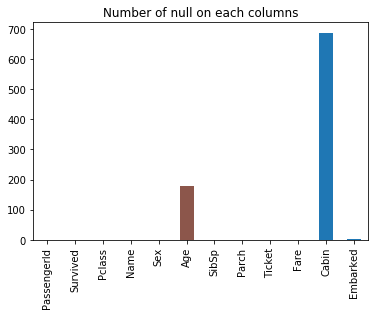

In [5]:
# Create a bar chart showing how many missing values are in each column
Riders.isnull().sum().plot(kind="bar");
plt.title("Number of null on each columns");

In [33]:
# Which column has the most `NaN` values? How many cells in that column are empty?
Riders.isnull().sum().idxmax()

'Age'

In [38]:
Riders.Cabin.isnull().sum()

0

In [8]:
# Delete all rows where `Embarked` is empty
Riders.Embarked.dropna(inplace=True);

#### To reach and to make sure that my soultion is correct I first run `Riders.Embarked.value_counts(dropna=False)` which returned the number with the number of `NaN` values, then after excuting the above code the number has been reudce and removed, therefor no `NaN` value exisit.

## Question here : why `rename` did not work!? 

In [9]:
# Fill all empty cabins with **¯\\_(ツ)_/¯**
Riders.Cabin.fillna(value='**¯\\_(ツ)_/¯**',inplace=True);

<br>

***

In [10]:
#### There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
FamMembers = Riders.SibSp + Riders.Parch;
Riders['FamMembers'] = FamMembers;

### Question here: What is the special in there title.

#### Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

In [11]:
# Answer here:

### In order to feed our training data into a classification algorithm, 
 we need to convert our categories into 1's and 0's using `pd.get_dummies`
- Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. 
 These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column

In [12]:
Riders['Embarked_C'] = Riders.Embarked=='C'
Riders.Embarked_C.replace([True],1,inplace=True);

In [13]:
Riders['Embarked_Q'] = Riders.Embarked=='Q';
Riders.Embarked_Q.replace([True],1,inplace=True);

In [14]:
Riders['Embarked_S'] = Riders.Embarked=='S';
Riders.Embarked_S.replace([True],1,inplace=True);

### Do the same thing for `Sex`

In [15]:
Riders["Male"] = Riders.Sex=='male';
Riders.Male.replace([True],1,inplace=True);

In [16]:
Riders["Female"] = Riders.Sex=='female';
Riders.Female.replace([True],1,inplace=True);

<br>

----


In [17]:
# What was the survival rate overall?

# Riders.Survived.value_counts(normalize=True).mul(100)
Survived =  Riders[Riders.Survived==1].Survived.count() ; 
Overall= Riders.Survived.count();
rate = round(((Survived/Overall)*100),1);
print(str(rate)+"%");

38.4%


In [18]:
# Which gender fared the worst? What was their survival rate?

Riders.groupby('Survived')['Sex'].describe() # this showes that the number of women is greater then man.
SurvFema =  Riders[(Riders.Survived==1) & (Riders.Sex=="female")].Survived.count()
Overall= Riders.Survived.count();
rateFam = round(((SurvFema/Overall)*100),1);
print(str(rateFam)+"%");
# RateFemOFSur = round(((rateFam/rate)*100),1);
# print(str(RateFemOFSur)+"%") // 68.2% is the percentage of Survived of women who Survived from the total survival.

26.2%


In [19]:
# What was the survival rate for each `Pclass`?

Riders.groupby('Survived')['Pclass'].describe(); # Showes the numbers, the count of (1) for Pclass => 342.
pClass_Sur_1 = Riders[(Riders.Pclass==1) & (Riders.Survived==1) ].Pclass.count();
pClass_Sur_Total_1 = Riders[(Riders.Pclass==1) ].Pclass.count();
Rate_Surv_1 = round(((pClass_Sur_1/pClass_Sur_Total_1)*100),1);  
print(str(Rate_Surv_1)+"%");

pClass_Sur_2 = Riders[(Riders.Pclass==2) & (Riders.Survived==1) ].Pclass.count();
pClass_Sur_Total_2 = Riders[(Riders.Pclass==2) ].Pclass.count();
Rate_Surv_2 = round(((pClass_Sur_2/pClass_Sur_Total_2)*100),1);  
print(str(Rate_Surv_2)+"%");

pClass_Sur_3 = Riders[(Riders.Pclass==3) & (Riders.Survived==1) ].Pclass.count();
pClass_Sur_Total_3 = Riders[(Riders.Pclass==3) ].Pclass.count();
Rate_Surv_3 = round(((pClass_Sur_3/pClass_Sur_Total_3)*100),1);  
print(str(Rate_Surv_3)+"%");

# pClass_Sur_2 = Riders[(Riders.Pclass==2) & (Riders.Survived==1) ].Pclass.count();
# pClass_Sur_3 = Riders[(Riders.Pclass==3) & (Riders.Survived==1)].Pclass.count();
# Rate_Surv_2 = round(((pClass_Sur_2/SurvPclass)*100),1);
# print(str(Rate_Surv_2)+"%");# the rate of survived and in the Pclass number 2 is (25.4%)
# Rate_Surv_3 = round(((pClass_Sur_3/SurvPclass)*100),1);
# print(str(Rate_Surv_3)+"%");# the rate of survived and in the Pclass number 2 is (34.8%)
# # The summation of all of them result in 100%.
# # (0) = 549

63.0%
47.3%
24.2%


### Question Not solved.., Did any reverends survive? How many?

In [21]:
# # What is the survival rate for people whose `Age` is empty?
EmptySur = Riders[(Riders.Age.isnull()) & (Riders.Survived==1) ].Survived.count();
Total_Surv = Riders[Riders.Survived==1].Survived.count();
Rate_Surv_Empty = round(((EmptySur/Total_Surv)*100),1);  
print(str(Rate_Surv_Empty)+"%");


15.2%


In [22]:
# What is the survival rate for each port of embarkation?
Riders.groupby('Embarked')['Survived'].describe()
Embarked_Sur_C = Riders[(Riders.Embarked=='C') & (Riders.Survived==1) ].Embarked.count();
Embarked_Sur_Total_C = Riders[(Riders.Embarked=='C') ].Embarked.count();
Rate_Surv_Embarked_C = round(((Embarked_Sur_C/Embarked_Sur_Total_C)*100),1);  
print(str(Rate_Surv_Embarked_C)+"%");

Embarked_Sur_Q = Riders[(Riders.Embarked=='Q') & (Riders.Survived==1) ].Embarked.count();
Embarked_Sur_Total_Q = Riders[(Riders.Embarked=='Q') ].Embarked.count();
Rate_Surv_Embarked_Q = round(((Embarked_Sur_Q/Embarked_Sur_Total_Q)*100),1);  
print(str(Rate_Surv_Embarked_Q)+"%");


Embarked_Sur_S = Riders[(Riders.Embarked=='S') & (Riders.Survived==1) ].Embarked.count();
Embarked_Sur_Total_S = Riders[(Riders.Embarked=='S') ].Embarked.count();
Rate_Surv_Embarked_S = round(((Embarked_Sur_S/Embarked_Sur_Total_S)*100),1);  
print(str(Rate_Surv_Embarked_S)+"%");



55.4%
39.0%
33.7%


In [23]:
#  What is the survival rate for children (under 12) in each `Pclass`?

# What was the survival rate for each `Pclass`?

Riders.groupby('Survived')['Pclass'].describe(); # Showes the numbers, the count of (1) for Pclass => 342.
pClass_Sur_Under12_1 = Riders[(Riders.Pclass==1) & (Riders.Survived==1) & (Riders.Age < 12)].Pclass.count();
pClass_Sur_Total_Under12_1 = Riders[(Riders.Pclass==1) ].Pclass.count();
Rate_Surv_Under12_1 = round(((pClass_Sur_Under12_1/pClass_Sur_Total_Under12_1)*100),1);  
print(str(Rate_Surv_Under12_1)+"%");

pClass_Sur_Under12_2 = Riders[(Riders.Pclass==2) & (Riders.Survived==1) & (Riders.Age < 12)].Pclass.count();
pClass_Sur_Total_Under12_2 = Riders[(Riders.Pclass==2) ].Pclass.count();
Rate_Surv_Under12_2 = round(((pClass_Sur_Under12_2/pClass_Sur_Total_Under12_2)*100),1);  
print(str(Rate_Surv_Under12_2)+"%");


pClass_Sur_Under12_3 = Riders[(Riders.Pclass==3) & (Riders.Survived==1) & (Riders.Age < 12)].Pclass.count();
pClass_Sur_Total_Under12_3 = Riders[(Riders.Pclass==3) ].Pclass.count();
Rate_Surv_Under12_3 = round(((pClass_Sur_Under12_3/pClass_Sur_Total_Under12_3)*100),1);  
print(str(Rate_Surv_Under12_3)+"%");

1.4%
9.2%
3.9%


In [24]:
# Did the captain of the ship survive? Is he on the list?
print("No");
print("Yes , The captain info : " );
Riders[Riders.Name.str.contains("Capt")]

No
Yes , The captain info : 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamMembers,Embarked_C,Embarked_Q,Embarked_S,Male,Female
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0.0,0.0,1.0,1.0,0.0


In [30]:
# Of all the people that died, who had the most expensive ticket? How much did it cost?
Riders[Riders.Survived==0].groupby("Survived")["Fare"].max()


Survived
0    263.0
Name: Fare, dtype: float64

In [26]:
# Does having family on the boat help or hurt your chances of survival?
TotalSurv = Riders[Riders.Survived==1].Survived.count();

Family =  (Riders.SibSp!=0) | (Riders.Parch!=0)  # True = He has a Family
notFamily = (Riders.SibSp==0) & (Riders.Parch==0) # True = He doesn't have a Family.
WithoutFamily = Riders[(Riders.Survived==1) & notFamily ].Survived.count();
Rate_WithoutFamily = round(((WithoutFamily/TotalSurv)*100),1);  
print("The rate of suvrvival if you don't have a familly: |",str(Rate_WithoutFamily)+"%");

WithoFamily = Riders[(Riders.Survived==1) & Family ].Survived.count();
Rate_WithFamily = round(((WithoFamily/TotalSurv)*100),1);  
print("The rate of suvrvival if you have a familly:       |", str(Rate_WithFamily)+"%");
   
print("So, if you think of traviling remeber to bring your familly AlWAYS.")

The rate of suvrvival if you don't have a familly: | 47.7%
The rate of suvrvival if you have a familly:       | 52.3%
So, if you think of traviling remeber to bring your familly AlWAYS.
